### Author: Narendra Eluri

### Created On: 04-09-2024

### About Dataset

### Context
Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy. Here, we present you a dataset which would allow the users to build a predictive model to recommend the most suitable crops to grow in a particular farm based on various parameters.

### Source
This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India. Gathered over the period by ICFA, India.

### Data fields
N - ratio of Nitrogen content in soil
P - ratio of Phosphorous content in soil
K - ratio of Potassium content in soil
temperature - temperature in degree Celsius
humidity - relative humidity in %
ph - ph value of the soil
rainfall - rainfall in mm

COPYRIGHT: Indian Chamber of Food and Agriculture https://www.icfa.org.in/



### Import required Libraries for the Project

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Frame Creation - Calling Data

In [ ]:
df = pd.read_csv("/content/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


### Details about the Dataset

In [ ]:
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (2200, 8)


In [ ]:
print("No.of Rows in the Dataset:",df.shape[0])

No.of Rows in the Dataset: 2200


In [ ]:
print("No.of Columns in the Dataset:",df.shape[1])

No.of Columns in the Dataset: 8


In [ ]:
print("The size of the Dataset:",df.size,"Values")


The size of the Dataset: 17600 Values


In [ ]:
print("Statistics about Numerical Columns of the Dataset:\n",df.describe())

Statistics about Numerical Columns of the Dataset:
                  N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max      

In [ ]:
print("Column Wise Information")
df.info()

Column Wise Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Data Types of the Columns

In [ ]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,float64
humidity,float64
ph,float64
rainfall,float64
label,object


### Null Report of the Dataset

In [ ]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
print("No.of Nulls present in the dataset:",df.isnull().sum().sum())

No.of Nulls present in the dataset: 0


### Columns in the Dataset

In [ ]:
for col in df.columns:
    print(col)

N
P
K
temperature
humidity
ph
rainfall
label


### HIstogram for all numerical features to show their distributions

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

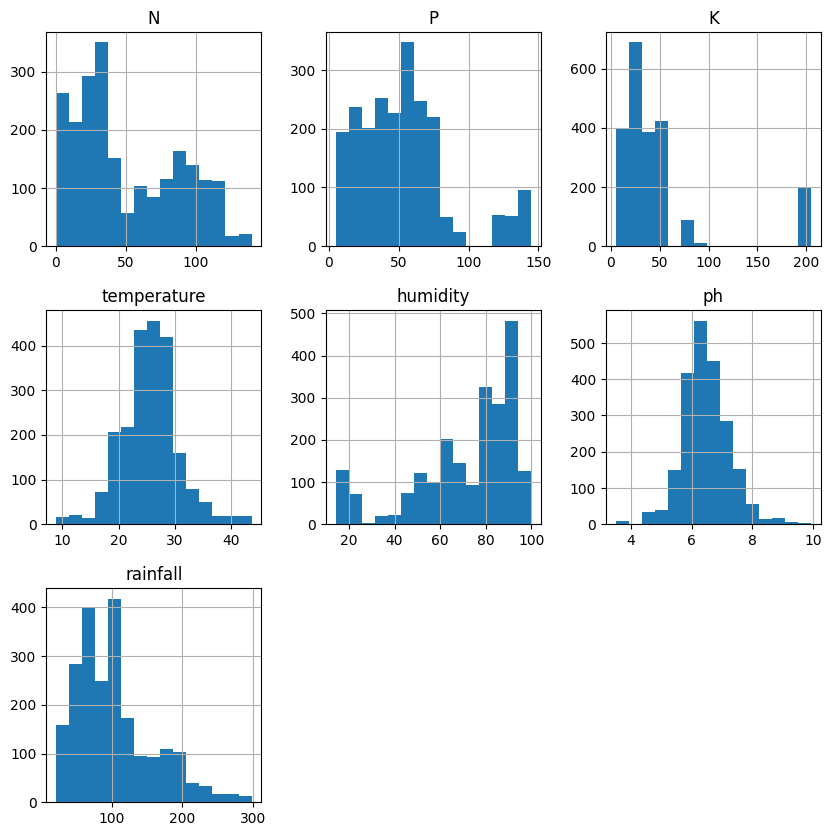

In [ ]:
df.hist(bins=15,figsize=(10,10))

<Axes: ylabel='temperature'>

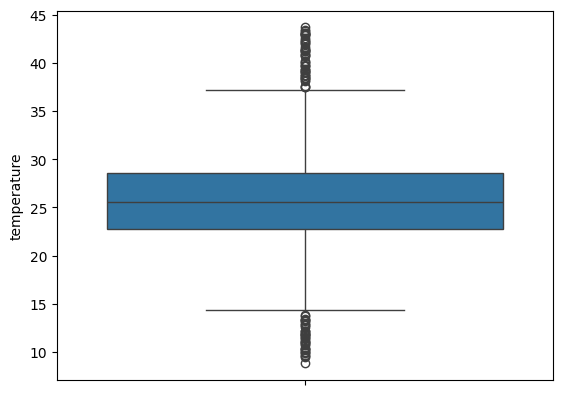

In [ ]:
sns.boxplot(y='temperature',data=df)

### Note: Temperature Column is having Outliers which are to be removed.

<Axes: ylabel='N'>

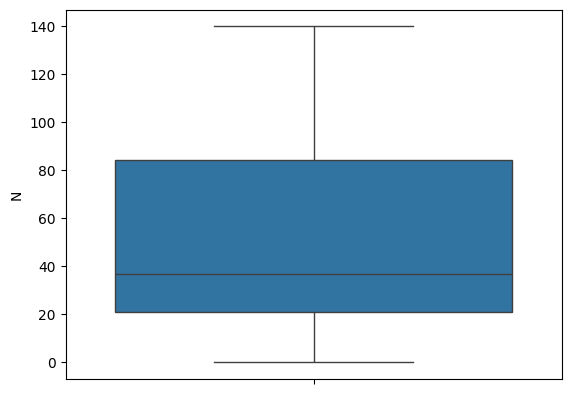

In [ ]:
sns.boxplot(y='N',data=df)

### Note: Nitrogen(N) Column is not having Outliers.

<Axes: ylabel='P'>

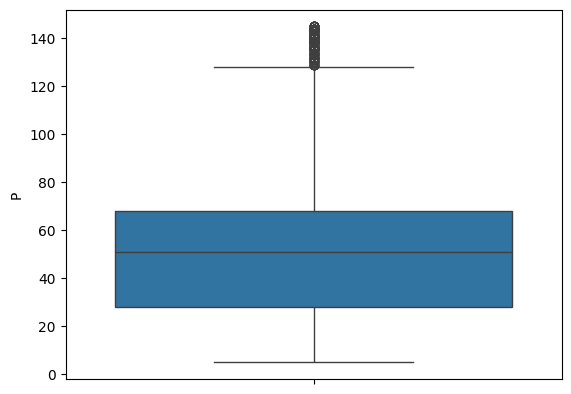

In [ ]:
sns.boxplot(y='P',data=df)

### Note: Phosporous(P) Column is having Outliers which are to be removed.

<Axes: ylabel='K'>

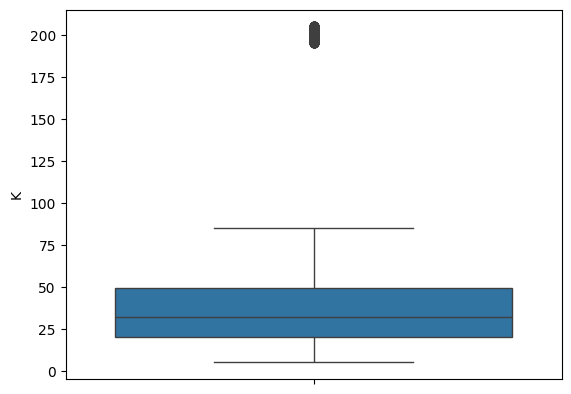

In [ ]:
sns.boxplot(y='K',data=df)

### Note: Potasium(K) Column is having Outliers which are to be removed.

<Axes: ylabel='humidity'>

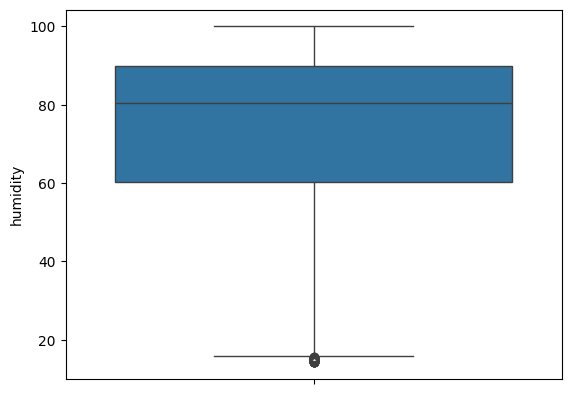

In [ ]:
sns.boxplot(y='humidity',data=df)

### Note: Humidity Column is having Outliers which are to be removed.

<Axes: ylabel='ph'>

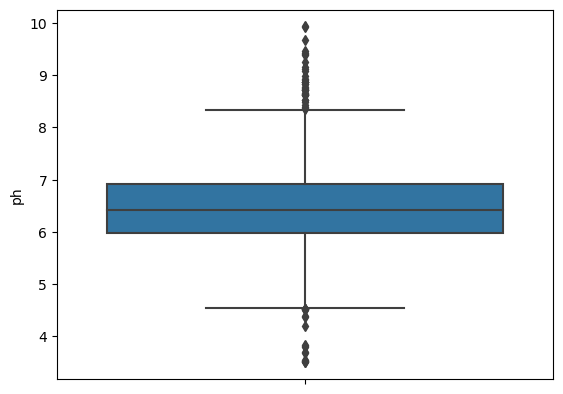

In [ ]:
sns.boxplot(y='ph',data=df)

### Note: ph Column is having Outliers which are to be removed.

<Axes: ylabel='rainfall'>

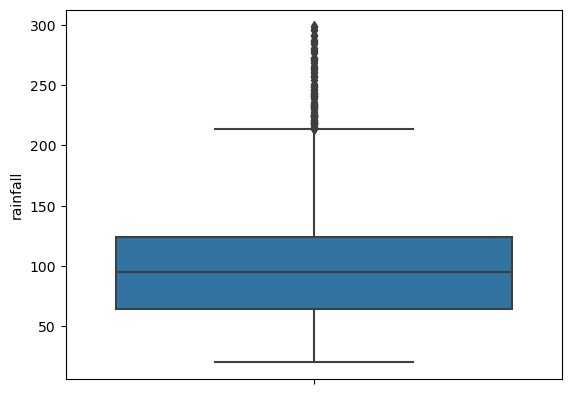

In [ ]:
sns.boxplot(y='rainfall',data=df)

### Note: rainfall Column is having Outliers which are to be removed.

### Program to identify Lower bound and Upper bound outlier values of given column of the Dataset

In [ ]:
def remove_outlier(col_name):
    sorted(col_name)
    Q1,Q3 = col_name.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound


### Identifying lower bound and upper bound outlier values for P Column & Removing Outliers

In [ ]:
low, high = remove_outlier(df['P'])

In [ ]:
df['P'] = np.where(df['P']>high,high,df['P'])

In [ ]:
df['P'] = np.where(df['P']<low,low,df['P'])

<Axes: ylabel='P'>

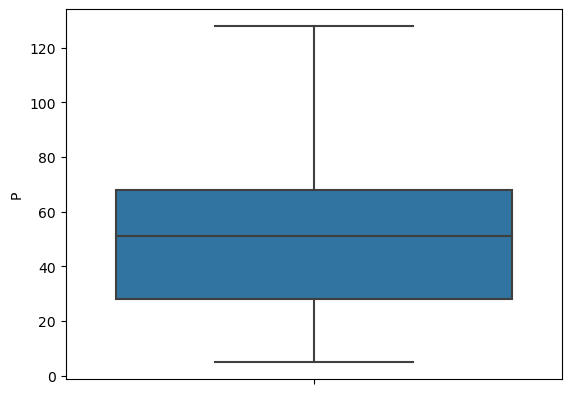

In [ ]:
sns.boxplot(y='P',data=df)

### Identifying lower bound and upper bound outlier values for K Column & Removing Outliers

In [ ]:
low, high = remove_outlier(df['K'])

In [ ]:
df['K'] = np.where(df['K']>high,high,df['K'])

In [ ]:
df['K'] = np.where(df['K']<low,low,df['K'])

<Axes: ylabel='K'>

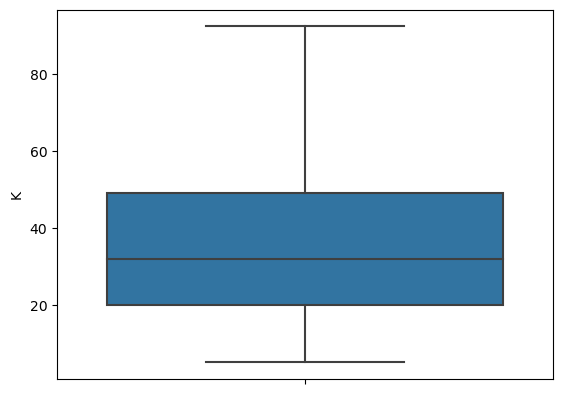

In [ ]:
sns.boxplot(y='K',data=df)

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

### ### Identifying lower bound and upper bound outlier values for ph Column & Removing Outliers

In [ ]:
low, high = remove_outlier(df['ph'])

In [ ]:
df['ph'] = np.where(df['ph']>high,high,df['ph'])

In [ ]:
df['ph'] = np.where(df['ph']<low,low,df['ph'])

<Axes: ylabel='ph'>

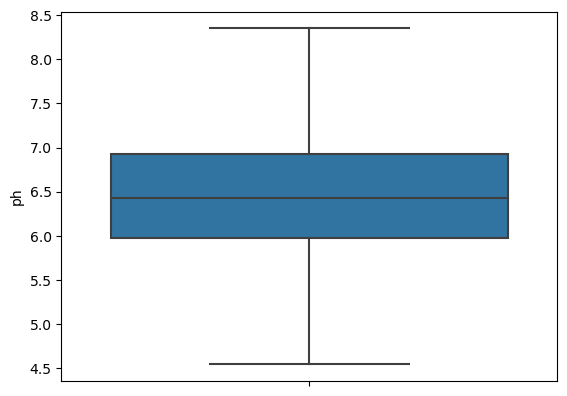

In [ ]:
sns.boxplot(y='ph',data=df)

### Identifying lower bound and upper bound outlier values for rainfall Column & Removing Outliers

In [ ]:
low, high = remove_outlier(df['rainfall'])

In [ ]:
df['rainfall'] = np.where(df['rainfall']>high,high,df['rainfall'])

In [ ]:
df['rainfall'] = np.where(df['rainfall']<low,low,df['rainfall'])

<Axes: ylabel='rainfall'>

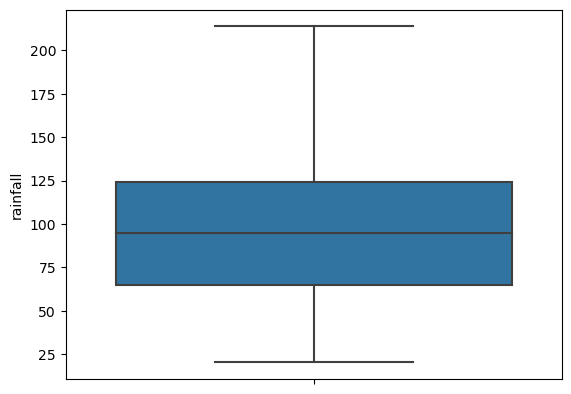

In [ ]:
sns.boxplot(y='rainfall',data=df)

### Identifying lower bound and upper bound outlier values for temperature Column & Removing Outliers

In [ ]:
low, high = remove_outlier(df['temperature'])

In [ ]:
df['temperature'] = np.where(df['temperature']>high,high,df['temperature'])

In [ ]:
df['temperature'] = np.where(df['temperature']<low,low,df['temperature'])

<Axes: ylabel='temperature'>

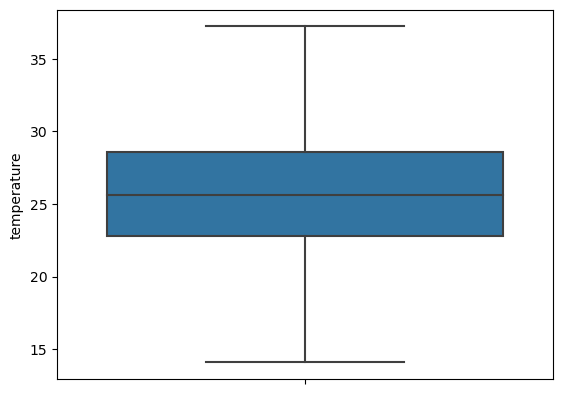

In [ ]:
sns.boxplot(y='temperature',data=df)

### Identifying lower bound and upper bound outlier values for humidity Column & Removing Outliers

In [ ]:
low, high = remove_outlier(df['humidity'])

In [ ]:
df['humidity'] = np.where(df['humidity']>high,high,df['humidity'])

In [ ]:
df['humidity'] = np.where(df['humidity']<low,low,df['humidity'])

<Axes: ylabel='humidity'>

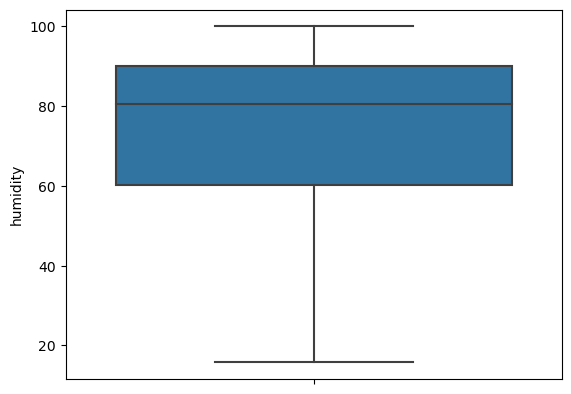

In [ ]:
sns.boxplot(y='humidity',data=df)

<Axes: ylabel='N'>

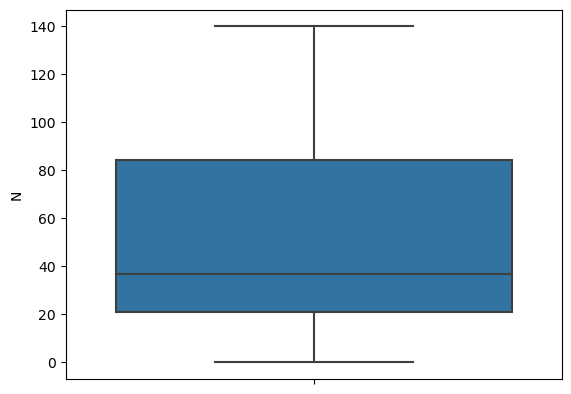

In [ ]:
sns.boxplot(y='N',data=df)

In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42.0,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85,58.0,41.0,21.770462,80.319644,7.038096,213.841241,rice
2,60,55.0,44.0,23.004459,82.320763,7.840207,213.841241,rice
3,74,35.0,40.0,26.491096,80.158363,6.980401,213.841241,rice
4,78,42.0,42.0,20.130175,81.604873,7.628473,213.841241,rice


### Scatter Plot of Temperature vs Humidity

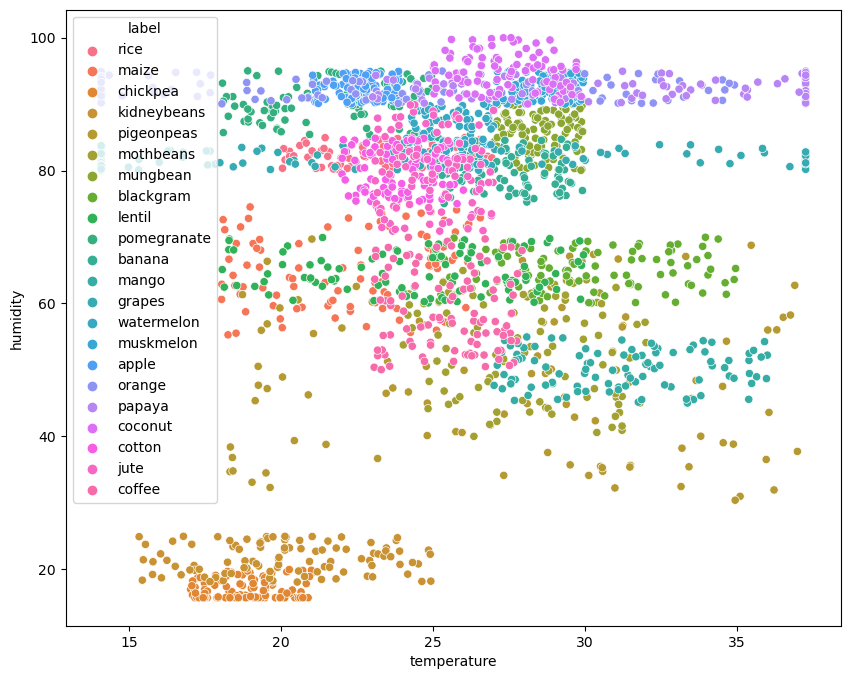

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='temperature',y='humidity',hue='label',data=df)
plt.show()

### Note: Identified No Relation between temperature and humidity values

### PH value for each Crop

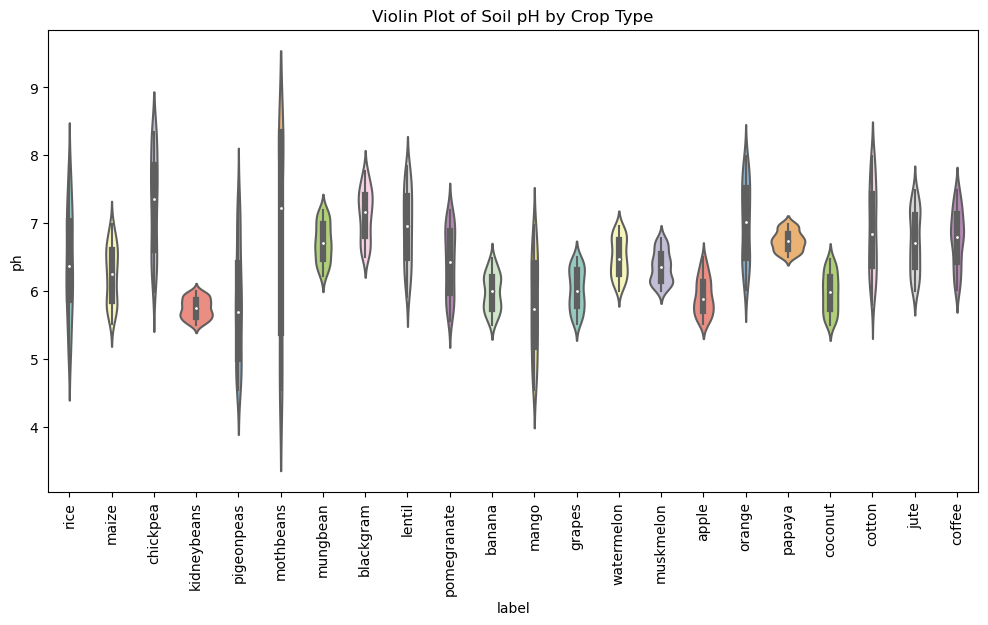

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x="label", y="ph", data=df, palette="Set3")
plt.title("Violin Plot of Soil pH by Crop Type")
plt.xticks(rotation=90)
plt.show()

### Note: Chickpea crop requires high ph

### Requirements for N, P, K for various Crops

/tmp/ipython-input-762824588.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="N", data=df, palette="Set2")
/tmp/ipython-input-762824588.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="P", data=df, palette="Set2")
/tmp/ipython-input-762824588.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="K", data=df, palette="Set2")


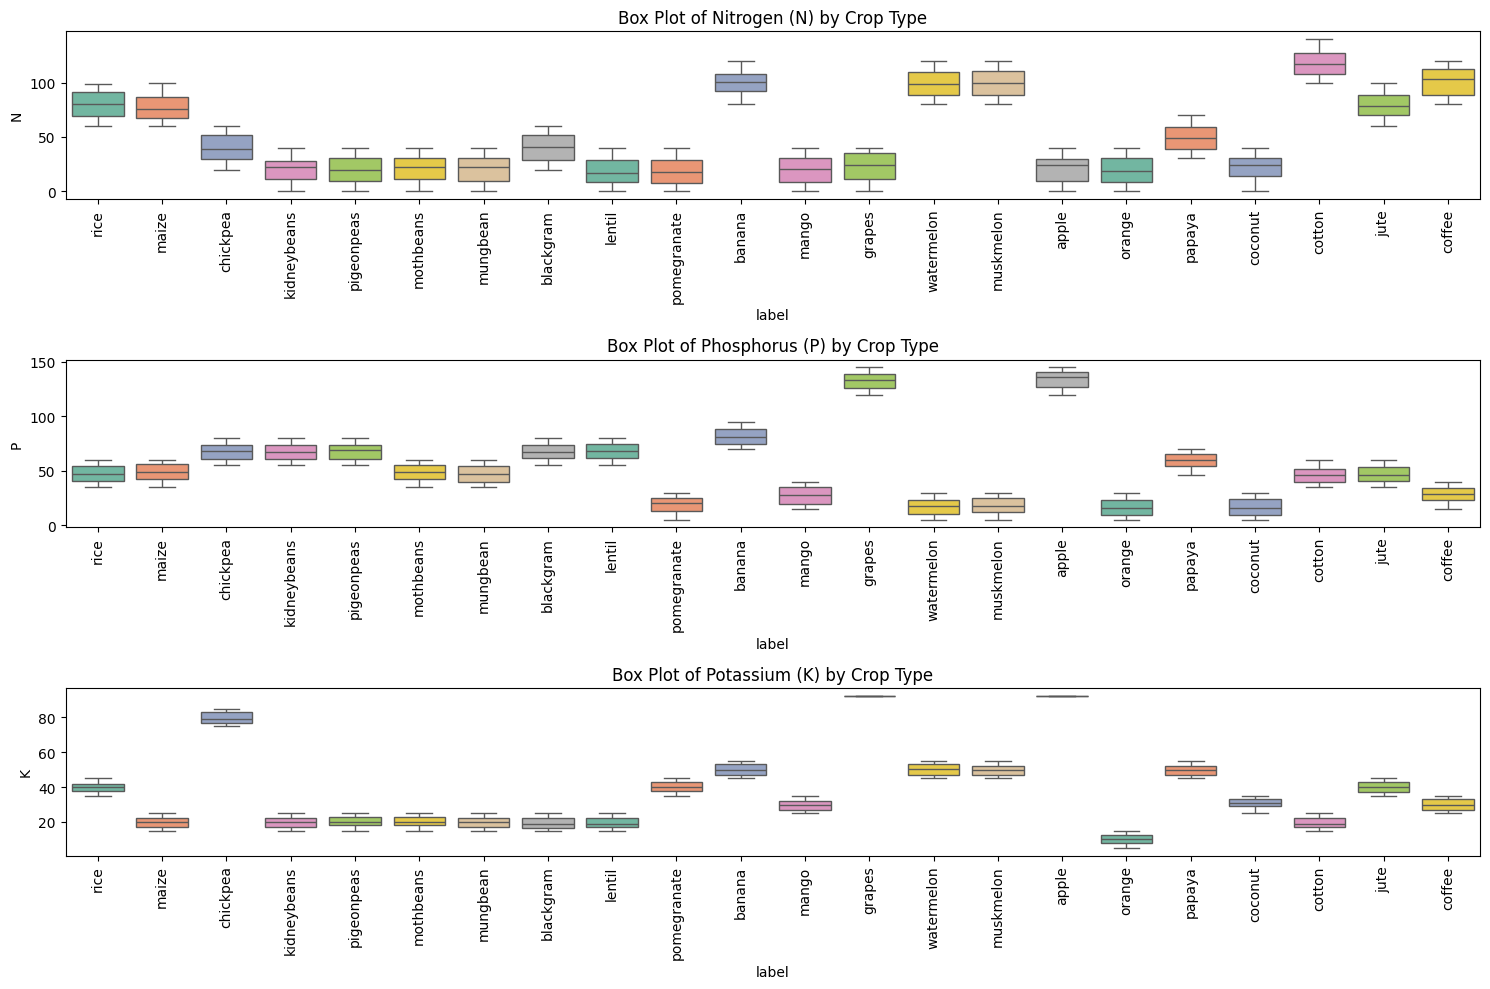

In [ ]:
plt.figure(figsize=(15, 10))

# Box plot for Nitrogen (N)
plt.subplot(3, 1, 1)
sns.boxplot(x="label", y="N", data=df, palette="Set2")
plt.title("Box Plot of Nitrogen (N) by Crop Type")
plt.xticks(rotation=90)

# Box plot for Phosphorus (P)
plt.subplot(3, 1, 2)
sns.boxplot(x="label", y="P", data=df, palette="Set2")
plt.title("Box Plot of Phosphorus (P) by Crop Type")
plt.xticks(rotation=90)

# Box plot for Potassium (K)
plt.subplot(3, 1, 3)
sns.boxplot(x="label", y="K", data=df, palette="Set2")
plt.title("Box Plot of Potassium (K) by Crop Type")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Note: Identified Cotton Crop requires highest Nitrogen, Grapes&Apples requires highest Phosporous and Potasium.

### Crops requiring Nitrogen availability

<Axes: xlabel='N', ylabel='label'>

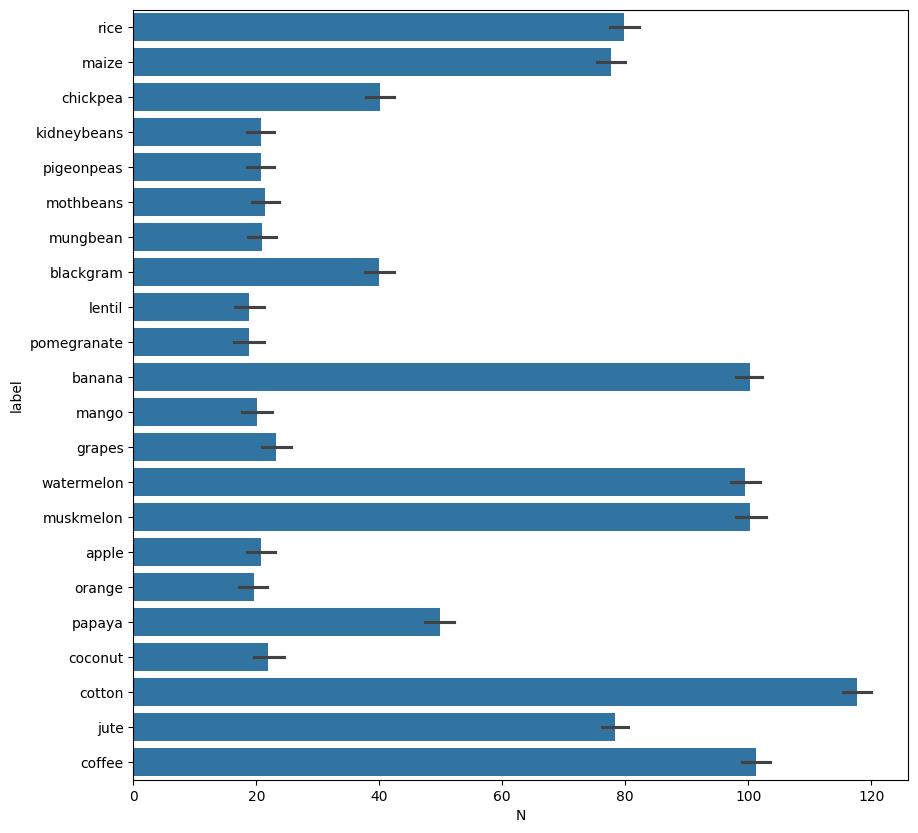

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(y='label',x='N',data=df)

### Note: Cotton requires high N values. We can repeat the above chart for various inputs

### Crops requiring Phosphorous Availability

In [ ]:
df.groupby(['label'])['K'].mean().sort_values(ascending=False)

,K
label,
apple,92.50
grapes,92.50
chickpea,79.92
watermelon,50.22
muskmelon,50.08
banana,50.05
papaya,50.04
pomegranate,40.21
jute,39.99


### Note: Grapes nad Apples requires high Phosporous